**CREDIT CARD FRAUD DETECTION**



In [ ]:
#IMPORTING LIBRARIES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import imblearn
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load data from files

df= pd.read_csv("/content/creditcard.csv",error_bad_lines=False)
df = df[['Class', 'Amount']]
df.head()

Skipping line 5966: expected 31 fields, saw 51



,Class,Amount
0,0.0,149.62
1,0.0,2.69
2,0.0,378.66
3,0.0,123.50
4,0.0,69.99


check for negative values

In [ ]:
print((df < 0).any())

Class     False
Amount    False
dtype: bool


check for missing values

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)

# Construct a DataFrame to display the results
nans = pd.DataFrame({
    'col_name': percent_missing.index,
    'percent_missing': percent_missing.values
})

print(nans)


  col_name  percent_missing
0    Class         0.007880
1   Amount         0.006304


In [ ]:
df.dropna()

,Class,Amount
0,0.0,149.62
1,0.0,2.69
2,0.0,378.66
3,0.0,123.50
4,0.0,69.99
...,...,...
63447,0.0,36.59
63448,0.0,0.76
63449,0.0,42.90
63450,0.0,1.98


In [ ]:
#Dropping null values
df.dropna(how='any', inplace=True)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)

# Construct a DataFrame to display the results
nans = pd.DataFrame({
    'col_name': percent_missing.index,
    'percent_missing': percent_missing.values
})

print(nans)


  col_name  percent_missing
0    Class              0.0
1   Amount              0.0


Check for Data Imbalance

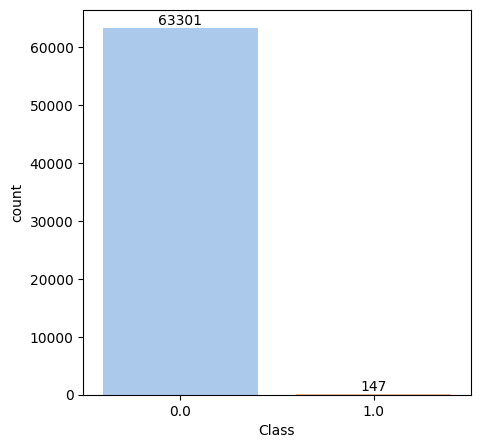

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df['Class'], data = df, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('Dataset size: ', len(df))
print('Not Fraud:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Dataset size:  63448
Not Fraud: 99.77 % of the dataset
Fraud: 0.23 % of the dataset


Train/Test Split

In [ ]:
target = df['Class']
x = df['Amount']

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size = 0.3, random_state = 42)

In [ ]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 44413
Testing set size: 19035


In [ ]:
zeros_count_or = (y_train == 0).sum().sum()
ones_count_or = (y_train == 1).sum().sum()

zeros_percentage_or = (zeros_count_or / len(y_train)) * 100
ones_percentage_or = (ones_count_or / len(y_train)) * 100

print(f"Not fraud in the original training data: {zeros_percentage_or:.2f}%")
print(f"Fraud in the original training data: {ones_percentage_or:.2f}%\n")

print("Number Fraud points in the original training data:", zeros_count_or)
print("Number Not fraud points in the original training data:", ones_count_or)

Not fraud in the original training data: 99.76%
Fraud in the original training data: 0.24%

Number Fraud points in the original training data: 44307
Number Not fraud points in the original training data: 106


Data Imbalance Techniques

In [ ]:
train_df = pd.concat([X_train,y_train],axis=1)


not_fraud = train_df[train_df.Class==0]
fraud = train_df[train_df .Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace = True, # sample with replacement
                          n_samples = len(not_fraud), # match number in majority class
                          random_state = 27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

zeros_count = (upsampled.Class == 0).sum()
ones_count = (upsampled.Class == 1).sum()
total_count = len(upsampled)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print("Number of Fraud points in oversampled data:", ones_count)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 44307
Number of Fraud points in oversampled data: 44307


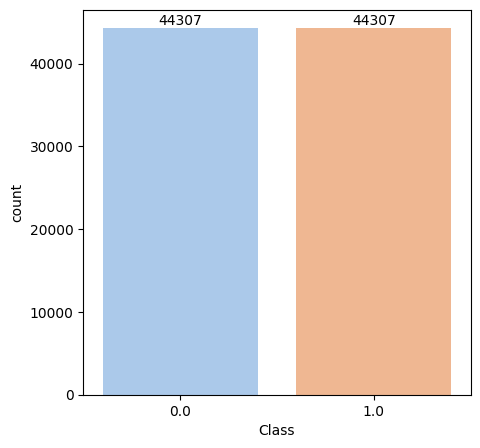

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = upsampled['Class'], data = upsampled, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Undersampling

In [ ]:
nfraud_undersampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
undersampled = pd.concat([nfraud_undersampled, fraud])

zeros_count = (undersampled.Class == 0).sum()
ones_count = (undersampled.Class == 1).sum()
total_count = len(undersampled)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 106
Number of Fraud points in undersampled data: 106


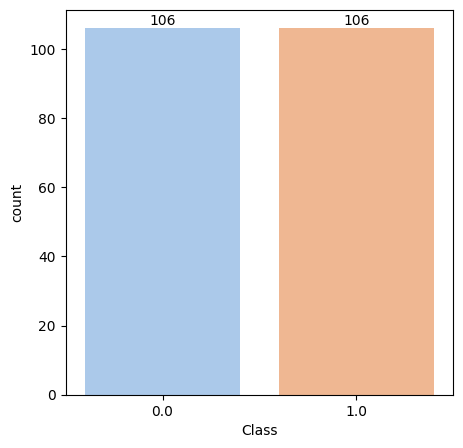

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = undersampled['Class'], data = upsampled, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

 Random Oversampling Using Imblearn

In [ ]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

random_oversampler = RandomOverSampler(sampling_strategy='auto')
X_over, y_over = random_oversampler.fit_resample(X_train_reshaped, y_train)

zeros_count = (y_over == 0).sum()
ones_count = (y_over == 1).sum()
total_count = len(y_over)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print("Number of Fraud points in oversampled data:", ones_count)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 44307
Number of Fraud points in oversampled data: 44307


In [ ]:
random_undsampler = RandomUnderSampler(sampling_strategy='auto')
X_under, y_under = random_undsampler.fit_resample(X_train_reshaped, y_train)

# Calculate the counts and percentages
zeros_count = (y_under == 0).sum()
ones_count = (y_under == 1).sum()
total_count = len(y_under)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 106
Number of Fraud points in undersampled data: 106


 SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
sm = SMOTE(random_state = 42, sampling_strategy='auto')
X_sm, y_sm = sm.fit_resample(X_train_reshaped, y_train)

zeros_count = (y_sm == 0).sum()
ones_count = (y_sm == 1).sum()
total_count = len(y_sm)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print("Number of Fraud points in oversampled data:", ones_count)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 44307
Number of Fraud points in oversampled data: 44307


Tomek Links Undersampling

In [ ]:
tomek = TomekLinks(sampling_strategy='auto')

X_tom, y_tom = tomek.fit_resample(X_train_reshaped, y_train)

zeros_count = (y_tom == 0).sum()
ones_count = (y_tom == 1).sum()
total_count = len(y_tom)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 99.76%
Fraud in undersampled data: 0.24%

Number of Not fraud points in undersampled data: 44303
Number of Fraud points in undersampled data: 106


SMOTE + Tomek Links Undersampling

In [ ]:
smt = SMOTETomek(random_state = 42, sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X_train_reshaped, y_train)

zeros_count = (y_smt == 0).sum()
ones_count = (y_smt == 1).sum()
total_count = len(y_smt)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 42110
Number of Fraud points in undersampled data: 42110


Cluster Centroids Undersampling

In [ ]:
from sklearn.cluster import MiniBatchKMeans
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)

X_cc, y_cc = cc.fit_resample(X_train_reshaped, y_train)

zeros_count = (y_cc == 0).sum()
ones_count = (y_cc == 1).sum()
total_count = len(y_cc)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 106
Number of Fraud points in undersampled data: 106


Adaptive Synthetic Sampling (ADASYN) Oversampling

In [ ]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train_reshaped, y_train)

zeros_count = (y_ada == 0).sum()
ones_count = (y_ada == 1).sum()
total_count = len(y_ada)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print("Number of Fraud points in oversampled data:", ones_count)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 44307
Number of Fraud points in oversampled data: 44306


Edited Nearest Neighbours Undersampling

In [ ]:
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_train_reshaped, y_train)

zeros_count = (y_enn == 0).sum()
ones_count = (y_enn == 1).sum()
total_count = len(y_enn)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 99.76%
Fraud in undersampled data: 0.24%

Number of Not fraud points in undersampled data: 44233
Number of Fraud points in undersampled data: 106


Comparing to original training data

In [ ]:
print(f"Not fraud in the original training data: {zeros_percentage_or:.2f}%")
print(f"Fraud in the original training data: {ones_percentage_or:.2f}%\n")

print("Number Fraud points in the original training data:", zeros_count_or)
print("Number Not fraud points in the original training data:", ones_count_or)

Not fraud in the original training data: 99.76%
Fraud in the original training data: 0.24%

Number Fraud points in the original training data: 44307
Number Not fraud points in the original training data: 106


Easy Ensemble of AdaBoost Learners

In [ ]:
eec = EasyEnsembleClassifier(random_state=42, n_estimators=10, base_estimator=AdaBoostClassifier())
eec.fit(X_train_reshaped, y_train)

y_pred_eec = eec.predict(X_test_reshaped)

RUSBoost

In [ ]:
rusboost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=100, sampling_strategy='auto', random_state=42)

# Fit the classifier
rusboost.fit(X_train_reshaped, y_train)

y_pred_rus = rusboost.predict(X_test_reshaped)

In [ ]:
acc=accuracy_score(y_pred_rus , y_test)

In [ ]:
acc

0.9005516154452324

The model has 90 percent of accuracy.